In [13]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

%matplotlib notebook

# Item 4.2
Cost function: 
$f(x)= -5x^5 + 4x^4 - 12x^3 + 11x^2 - 2x + 1 $

Interval: 
$[-0.5,0.5]$

Uncertanty range:
$10^{-5}$

<IPython.core.display.Javascript object>


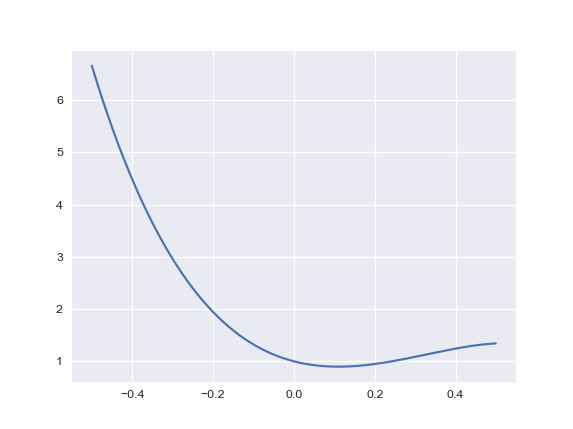

In [55]:
def f(x):
    return -5*x**5 + 4*x**4 - 12*x**3 + 11*x**2 - 2*x + 1

dx = 0.001
domain = np.arange(-0.5,0.5,dx)
domain.shape
plt.plot(domain,f(domain));

### A. Dichotomous search

In [67]:
def dichoSearch(lower,upper,cost,step=3e-6,delta=1e-5,eps=1e-15,verbose=False):

    while abs(upper - lower) > delta:
        if verbose:
            print('Range: ',abs(lower - upper))
        
        x = (lower + upper)/2
        costLow = cost(x - step/2)
        costUp = cost(x + step/2)

        if np.abs(costLow - costUp) < eps:
            upper = x + step/2
            lower = x - step/2
        elif costLow < costUp:
            upper = x + step/2
        else:
            # costLow > costUp:
            lower = x - step/2
            
    return x, costLow

### B. Fibonacci search

In [74]:
def fiboSearch(lower,upper,cost,n,verbose=False):
    
    fib = lambda n:reduce(lambda x,n:[x[1],x[0]+x[1]], range(n),[0,1])
    
    interval = upper - lower
    
    fibVals = fib(n)
    interval = (fibVals[0]/fibVals[1])*interval
    x_a = upper - interval
    x_b = lower + interval
    fx_a = cost(x_a)
    fx_b = cost(x_b)
    if verbose:
            print('Range: ',abs(lower - upper))
    
    for k in range(1,n-2):
        fibVals = fib(n-k)
        interval = (fibVals[0]/fibVals[1])*interval
        
        if x_a > x_b:
            return x_a, fx_a
        
        if verbose:
            print('Range: ',interval)
        
        if fx_a > fx_b:
            lower = x_a
            x_a = x_b
            x_b = lower + interval
            fx_a = fx_b
            fx_b = cost(x_b)
            
        else:
            upper = x_b
            x_b = x_a
            x_a = upper - interval
            fx_b = fx_a
            fx_a = cost(x_a)

    return x_a, fx_a

### C. Golden-section search

In [1]:
def goldenSearch(lower,upper,cost,delta=1e-5,eps=1e-15,verbose=False):
    
    K = (1 + np.sqrt(5))/2
    
    interval = upper - lower
    interval /= K
    x_a = upper - interval
    x_b = lower + interval
    fx_a = cost(x_a)
    fx_b = cost(x_b)
    if verbose:
            print('Range: ',abs(lower - upper))
    
    while x_a < x_b and interval > delta:
        
        interval /= K
        
        if verbose:
            print('Range: ',interval)
        
        if fx_a > fx_b:
            lower = x_a
            x_a = x_b
            x_b = lower + interval
            fx_a = fx_b
            fx_b = cost(x_b)
            
        else:
            upper = x_b
            x_b = x_a
            x_a = upper - interval
            fx_b = fx_a
            fx_a = cost(x_a)

    if abs(fx_a - fx_b) < eps:
        x_a = (x_a + x_b)/2
    elif fx_a > fx_b:
        x_a = (x_b + upper)/2
    else:
        # fx_a < fx_b:
        x_a = (lower + x_b)/2
    
    return x_a, cost(x_a)

### D. Quadratic interpolation

In [94]:
def quadraticSearch(lower,upper,cost,delta=1e-5,verbose=False):
    
    x_1 = lower
    x_3 = upper
    x_2 = (x_1 + x_3)/2
    
    f_1 = cost(x_1)
    f_2 = cost(x_2)
    f_3 = cost(x_3)
    
    x_min = np.inf
    xHat = x_2 + ((f_1 - f_3)*(x_3 - x_2))/(2*(f_1 - 2*f_2 + f_3))
    fHat = cost(xHat)

    while abs(xHat - x_min) > delta:
        print(xHat)
        if xHat <= x_2:
            if fHat <= f_2:
                x_3 = x_2
                f_3 = f_2
                x_2 = xHat
                f_2 = fHat
            else:
                # fHat > f_2
                x_1 = xHat
                f_1 = fHat
        else:
            # xHat > x_2
            if fHat <= f_2:
                x_1 = x_2
                f_1 = f_2
                x_2 = xHat
                f_2 = fHat
            else:
                # fHat > f_2
                x_3 = xHat
                f_3 = fHat

        x_min = xHat
        xHat = ((x_2**2 - x_3**2)*f_1 + (x_3**2 - x_1**2)*f_2 + (x_1**2 - x_2**2)*f_3)/ \
                        ((x_1 - x_2)*(x_3 - x_2)*(x_1 - x_3))

        fHat = cost(xHat)
        
        print('xmin: ',x_min)
        print('xHat: ',xHat)

    return x_min, fHat
#     if verbose:
#             print('Range: ',abs(lower - upper))

In [96]:
x, fx = quadraticSearch(-0.5,0.5,f,1e-10,False)
print('Minimizer found: ', x)
print('Minimum found: ', fx)

0.22135416666666666
xmin:  0.22135416666666666
xHat:  -0.7645164684013085
-0.7645164684013085
xmin:  -0.7645164684013085
xHat:  -8.698218411750323
-8.698218411750323
xmin:  -8.698218411750323
xHat:  -2465.878301580811
-2465.878301580811
xmin:  -2465.878301580811
xHat:  -54081344097.73616
-54081344097.73616
xmin:  -54081344097.73616
xHat:  -5.70507002167849e+32
-5.70507002167849e+32


OverflowError: (34, 'Numerical result out of range')

In [ ]:
def cubicSearch(lower,upper,cost,delta=1e-5,eps=1e-15,verbose=False):


### F. Davies-Swann-Campey

In [ ]:
def dscSearch(lower,upper,cost,delta=1e-5,eps=1e-15,verbose=False):


### G. Backtracking line 

In [68]:
x, fx = dichoSearch(-0.5,0.5,f,3e-6,1e-5,1e-8,False)
print('Minimizer found: ', x)
print('Minimum found: ', fx)

Minimizer found:  0.10986295166015625
Minimum found:  0.8976329719133278


In [77]:
x, fx = fiboSearch(-0.5,0.5,f,14,False)
print('Minimizer found: ', x)
print('Minimum found: ', fx)

Minimizer found:  0.10983606557377047
Minimum found:  0.8976329760305806


In [5]:
x, fx = goldenSearch(-0.5,0.5,f,1e-5,False)
print('Minimizer found: ', x)
print('Minimum found: ', fx)

Minimizer found:  0.109857691207
Minimum found:  0.897632971932


In [89]:
x, fx = quadraticSearch(-0.5,0.5,f,1e-5,False)
print('Minimizer found: ', x)
print('Minimum found: ', fx)

xmin:  0.22135416666666666
xHat:  0.22135416666666666
Minimizer found:  0.22135416666666666
Minimum found:  0.973061933320992


### Results

In [44]:
# df = pd.DataFrame(columns=['algo','func'])
df = pd.DataFrame(index=['Dichotomous','Fibonacci','Golden-section',
                         'Quadratic interpolation','Cubic interpolation',
                         'Davies-Swann-Campey', 'Backtracking line'],
                          columns=['func1','func2','func3'])
df

,func1,func2,func3
Dichotomous,NaN,NaN,NaN
Fibonacci,NaN,NaN,NaN
Golden-section,NaN,NaN,NaN
Quadratic interpolation,NaN,NaN,NaN
Cubic interpolation,NaN,NaN,NaN
Davies-Swann-Campey,NaN,NaN,NaN
Backtracking line,NaN,NaN,NaN


In [67]:
# def quadraticSearch(lower,upper,cost,delta=1e-5,verbose=False):
    
x_1 = -0.5
x_3 = 0.5
x_2 = (x_1 + x_3)/2

f_1 = f(x_1)
f_2 = f(x_2)
f_3 = f(x_3)

print(x_1)
print(x_2)
print(x_3)
print(f_1)
print(f_2)
print(f_3)

-0.5
0.0
0.5
6.65625
1.0
1.34375


In [88]:
xHat = x_2 + (f_1 - f_3)*(x_3 - x_2)/(2*(f_1 - 2*f_2 + f_3))
fHat = f(xHat)

print(xHat)
print(fHat)

0.22135416666666666
0.973061933320992


In [74]:
xHat = x_2 + (f_1 - f_3)*(x_3 - x_2)/2*(f_1 - 2*f_2 + f_3)